In [2]:
import pandas as pd 
import numpy as np

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris = pd.read_csv(url, header=None, names=columns)

In [3]:
print(f"\nDataset shape: {iris.shape}")
print(f"Classes: {iris['class'].unique()}")
# Dataset shape: (150, 5)
# Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Dataset shape: (150, 5)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 1200x1000 with 0 Axes>

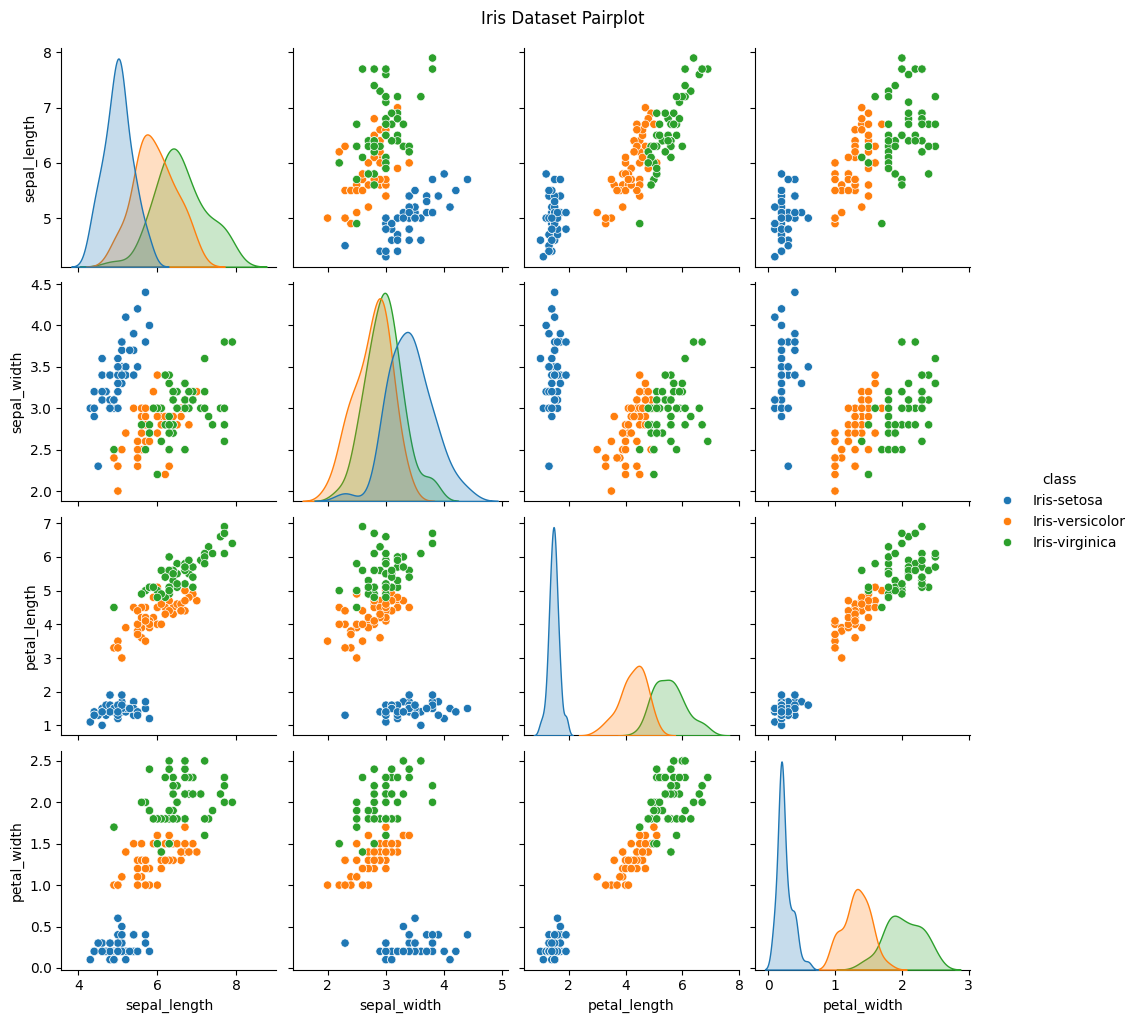

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 10))
sns.pairplot(iris, hue="class", diag_kind="kde")
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

In [6]:
# 1D Distance (L1/Manhattan)
def l1_distance_1d(a: float, b: float) -> float:
    return abs(a - b)

# Test 1D distance
A, B, C = 1.0, 2.5, 5.0
print(f"1D Distance Examples:")
print(f"Distance A to B: {l1_distance_1d(A, B)}")  # 1.5
print(f"Distance A to C: {l1_distance_1d(A, C)}")  # 4.0

1D Distance Examples:
Distance A to B: 1.5
Distance A to C: 4.0


In [7]:
# 2D Distance (L2/Euclidean)
import math

def l2_distance_2d(p: tuple[float, float], q: tuple[float, float]) -> float:
    dx = p[0] - q[0]
    dy = p[1] - q[1]
    return math.sqrt(dx*dx + dy*dy)

print(f"2D Distance Example:")
print(f"Distance (1,2) to (4,6): {l2_distance_2d((1,2), (4,6))}")  # 5.0

2D Distance Example:
Distance (1,2) to (4,6): 5.0


In [8]:
# N-dimensional Distance (L2/Euclidean)
def l2_distance_nd(x: np.ndarray, y: np.ndarray) -> float:
    diff = x - y
    return float(np.sqrt(np.dot(diff, diff)))

x = np.array([1., 2., 3.])
y = np.array([1., 5., 7.])
print(f"N-D Distance Example:")
print(f"Distance between [1,2,3] and [1,5,7]: {l2_distance_nd(x, y)}")  # 5.0

N-D Distance Example:
Distance between [1,2,3] and [1,5,7]: 5.0


In [9]:
# Different distance metrics comparison
from numpy.linalg import norm

u = np.array([1, 2, 3])
v = np.array([2, 5, 9])

print(f"Distance Metrics Comparison:")
print(f"L1 (Manhattan): {norm(u - v, ord=1)}")      # 10.0
print(f"L2 (Euclidean): {norm(u - v, ord=2)}")      # 6.78
print(f"L∞ (Chebyshev): {norm(u - v, ord=np.inf)}")  # 6.0

Distance Metrics Comparison:
L1 (Manhattan): 10.0
L2 (Euclidean): 6.782329983125268
L∞ (Chebyshev): 6.0


In [10]:
# KNN Implementation for 2 Features
from collections import Counter

class KNN2D:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))
    
    def predict_single(self, x):
        # Calculate distances to all training points
        distances = []
        for i in range(len(self.X_train)):
            dist = self._distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        # Sort by distance and get k nearest
        distances.sort()
        k_nearest = distances[:self.k]
        
        # Vote (most common class)
        votes = [label for _, label in k_nearest]
        return Counter(votes).most_common(1)[0][0]
    
    def predict(self, X):
        return [self.predict_single(x) for x in X]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Test with 2D version using petal features
X_2d = iris[['sepal_length', 'sepal_width']].values
y_2d = iris['class'].values

# Split data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.3, random_state=42
)

# Test the 2D model
knn_2d = KNN2D(k=3)
knn_2d.fit(X_train_2d, y_train_2d)
predictions_2d = knn_2d.predict(X_test_2d)

print(f"2D KNN Accuracy: {accuracy_score(y_test_2d, predictions_2d):.3f}") # 0.756

2D KNN Accuracy: 0.756


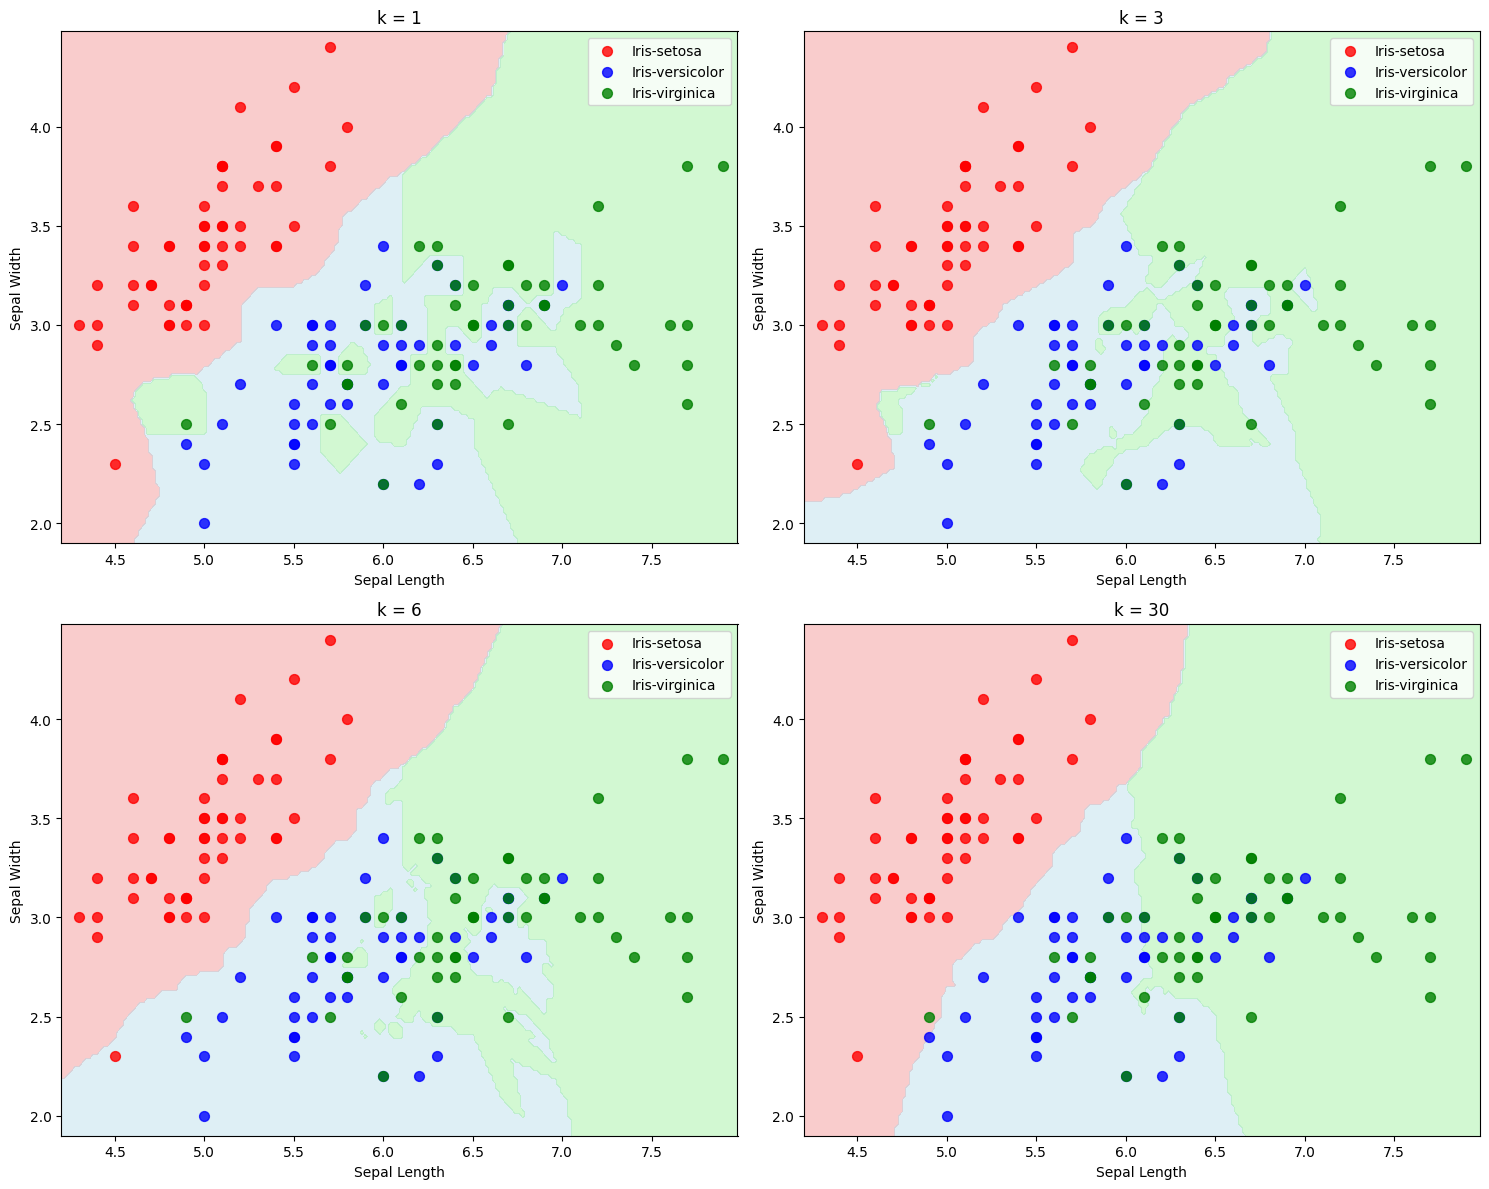

In [12]:
# Visualization of Decision Boundaries for Different K Values
def plot_decision_boundary(X, y, k_values=[1, 3, 6, 30]):
    y = np.asarray(y).ravel()  # works for lists/Series/arrays
    classes = np.unique(y)     # class names (strings or ints)
    class_to_idx = {c: i for i, c in enumerate(classes)}

    # colors (trimmed to number of classes)
    point_colors = ['red', 'blue', 'green'][:len(classes)]
    fill_colors  = ['lightcoral', 'lightblue', 'lightgreen'][:len(classes)]

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    # Mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    for idx, k in enumerate(k_values):
        knn = KNN2D(k=k)
        knn.fit(X, y)  # train with original labels (strings are fine)

        # Predict on mesh -> strings/ints -> map to integer indices for contourf
        Z_labels = np.array([knn.predict_single(p) for p in mesh_points])
        Z_idx = np.vectorize(class_to_idx.get)(Z_labels).astype(int).reshape(xx.shape)

        # Filled decision regions (numeric Z required)
        axes[idx].contourf(
            xx, yy, Z_idx,
            alpha=0.4,
            levels=np.arange(len(classes) + 1) - 0.5,
            colors=fill_colors
        )

        # Scatter the training points with original (readable) labels
        for i, c_name in enumerate(classes):
            mask = (y == c_name)
            axes[idx].scatter(
                X[mask, 0], X[mask, 1],
                c=point_colors[i], label=str(c_name), s=50, alpha=0.8
            )

        axes[idx].set_title(f'k = {k}')
        axes[idx].set_xlabel('Sepal Length')
        axes[idx].set_ylabel('Sepal Width')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

# Plot decision boundaries
plot_decision_boundary(X_2d, y_2d)


Testing different k values:
k=1: Accuracy = 0.689
k=3: Accuracy = 0.756
k=6: Accuracy = 0.800
k=30: Accuracy = 0.822


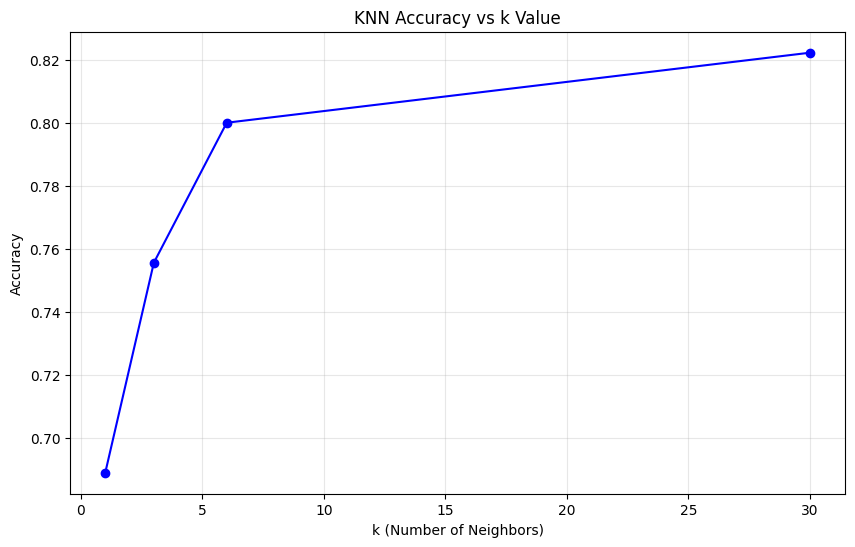


Best k: 30 with accuracy: 0.822


In [13]:
# Testing Different K Values
def test_different_k_values(X_train, X_test, y_train, y_test, k_range=[1, 3, 6, 30]):
    accuracies = []
    
    for k in k_range:
        knn = KNN2D(k=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
        print(f"k={k}: Accuracy = {accuracy:.3f}")
    
    # Plot accuracy vs k
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, 'bo-')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy vs k Value')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    best_k = k_range[np.argmax(accuracies)]
    print(f"\nBest k: {best_k} with accuracy: {max(accuracies):.3f}")
    return accuracies

# Test different k values
print("\nTesting different k values:")
accuracies = test_different_k_values(X_train_2d, X_test_2d, y_train_2d, y_test_2d)

# Testing different k values:
# k=1: Accuracy = 0.689
# k=3: Accuracy = 0.756
# k=6: Accuracy = 0.800
# k=30: Accuracy = 0.822

In [14]:
# Full N-Dimensional KNN Implementation
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def _distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict_single(self, x):
        # Calculate distances to all training points
        distances = []
        for i in range(len(self.X_train)):
            dist = self._distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        # Sort by distance and get k nearest
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Vote (most common class)
        votes = [label for _, label in k_nearest]
        return Counter(votes).most_common(1)[0][0]
    
    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.predict_single(x))
        return np.array(predictions)

In [15]:
# Test with all features
X_full = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_full = iris['class'].values

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42
)

Testing different feature combinations:
1 Feature (Petal Length): Accuracy = 0.956
2 Features (Petal L&W): Accuracy = 1.000
3 Features: Accuracy = 0.978
4 Features (All): Accuracy = 1.000


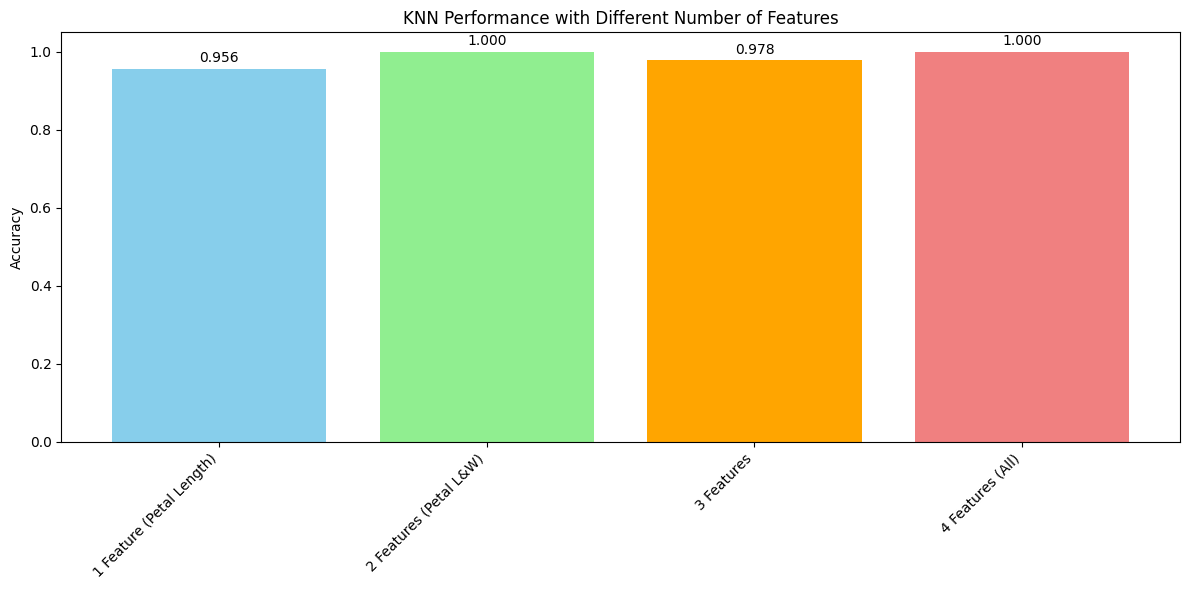

In [16]:
# Testing Different Numbers of Features
def test_feature_combinations():
    feature_combinations = [
        (['petal_length'], '1 Feature (Petal Length)'),
        (['petal_length', 'petal_width'], '2 Features (Petal L&W)'),
        (['sepal_length', 'sepal_width', 'petal_length'], '3 Features'),
        (['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], '4 Features (All)')
    ]
    
    results = []
    
    for features, description in feature_combinations:
        X = iris[features].values
        y = iris['class'].values
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )
        
        knn = KNNClassifier(k=3)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        results.append((description, accuracy))
        print(f"{description}: Accuracy = {accuracy:.3f}")
    
    # Visualization
    descriptions, accuracies = zip(*results)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(descriptions, accuracies, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
    plt.ylabel('Accuracy')
    plt.title('KNN Performance with Different Number of Features')
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

print("Testing different feature combinations:")
test_feature_combinations()

# Testing different feature combinations:
# 1 Feature (Petal Length): Accuracy = 0.956
# 2 Features (Petal L&W): Accuracy = 1.000
# 3 Features: Accuracy = 0.978
# 4 Features (All): Accuracy = 1.000

In [17]:
# Final Model with All Features
from sklearn.metrics import classification_report

# Train final model with k=4 and all features
final_knn = KNNClassifier(k=4)
final_knn.fit(X_train_full, y_train_full)
final_predictions = final_knn.predict(X_test_full)

print(f"Final Model Results (k=4, all features):")
print(f"Accuracy: {accuracy_score(y_test_full, final_predictions):.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test_full, final_predictions))

# Final Model Results (k=4, all features):
# Accuracy: 1.000

# Detailed Classification Report:
#                  precision    recall  f1-score   support

#     Iris-setosa       1.00      1.00      1.00        19
# Iris-versicolor       1.00      1.00      1.00        13
#  Iris-virginica       1.00      1.00      1.00        13

#        accuracy                           1.00        45
#       macro avg       1.00      1.00      1.00        45
#    weighted avg       1.00      1.00      1.00        45

Final Model Results (k=4, all features):
Accuracy: 1.000

Detailed Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45




Testing algorithm speed with different dataset sizes:
Dataset size: 100, Prediction time for 10 samples: 0.0031 seconds
Dataset size: 500, Prediction time for 10 samples: 0.0164 seconds
Dataset size: 1000, Prediction time for 10 samples: 0.0298 seconds
Dataset size: 5000, Prediction time for 10 samples: 0.1561 seconds
Dataset size: 10000, Prediction time for 10 samples: 0.3210 seconds
Dataset size: 50000, Prediction time for 10 samples: 1.7951 seconds


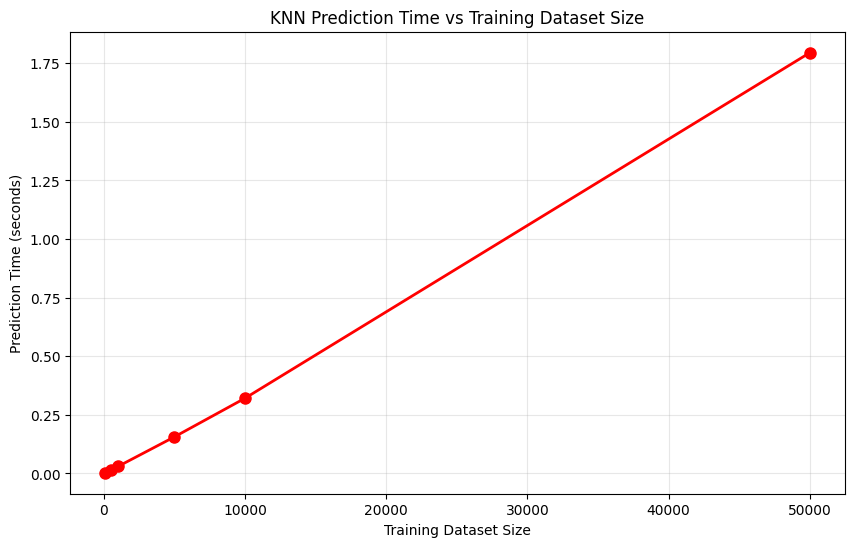

In [18]:
# Performance Testing with Large Dataset
import time

def create_large_dataset(n_samples=10000):
    """Create a simulated large dataset for performance testing"""
    np.random.seed(42)
    
    # Create 4 features with different patterns for 3 classes
    n_per_class = n_samples // 3
    
    # Class 0: centered around [2, 3, 1, 0.5]
    class_0 = np.random.multivariate_normal([2, 3, 1, 0.5], 
                                           [[0.5, 0.1, 0.1, 0.1],
                                            [0.1, 0.5, 0.1, 0.1],
                                            [0.1, 0.1, 0.3, 0.05],
                                            [0.1, 0.1, 0.05, 0.2]], n_per_class)
    
    # Class 1: centered around [5, 2, 4, 1.5]
    class_1 = np.random.multivariate_normal([5, 2, 4, 1.5], 
                                           [[0.6, 0.1, 0.2, 0.1],
                                            [0.1, 0.3, 0.1, 0.05],
                                            [0.2, 0.1, 0.5, 0.15],
                                            [0.1, 0.05, 0.15, 0.3]], n_per_class)
    
    # Class 2: centered around [6, 3, 5, 2]
    class_2 = np.random.multivariate_normal([6, 3, 5, 2], 
                                           [[0.7, 0.15, 0.1, 0.1],
                                            [0.15, 0.4, 0.05, 0.05],
                                            [0.1, 0.05, 0.6, 0.2],
                                            [0.1, 0.05, 0.2, 0.4]], n_per_class)
    
    X_large = np.vstack([class_0, class_1, class_2])
    y_large = np.hstack([np.zeros(n_per_class), 
                        np.ones(n_per_class), 
                        np.full(n_per_class, 2)])
    
    return X_large, y_large

def test_algorithm_speed():
    print("\nTesting algorithm speed with different dataset sizes:")
    
    sizes = [100, 500, 1000, 5000, 10000, 50000]
    times = []
    
    for size in sizes:
        X_large, y_large = create_large_dataset(size)
        X_train, X_test, y_train, y_test = train_test_split(
            X_large, y_large, test_size=0.2, random_state=42
        )
        
        # Take only first 10 test samples for timing
        X_test_small = X_test[:10]
        
        knn = KNNClassifier(k=3)
        knn.fit(X_train, y_train)
        
        start_time = time.time()
        predictions = knn.predict(X_test_small)
        end_time = time.time()
        
        prediction_time = end_time - start_time
        times.append(prediction_time)
        
        print(f"Dataset size: {size}, Prediction time for 10 samples: {prediction_time:.4f} seconds")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Training Dataset Size')
    plt.ylabel('Prediction Time (seconds)')
    plt.title('KNN Prediction Time vs Training Dataset Size')
    plt.grid(True, alpha=0.3)
    plt.show()

# Run speed test
test_algorithm_speed()

# Testing algorithm speed with different dataset sizes:
# Dataset size: 100, Prediction time for 10 samples: 0.0032 seconds
# Dataset size: 500, Prediction time for 10 samples: 0.0219 seconds
# Dataset size: 1000, Prediction time for 10 samples: 0.0428 seconds
# Dataset size: 5000, Prediction time for 10 samples: 0.1887 seconds
# Dataset size: 10000, Prediction time for 10 samples: 0.3739 seconds
# Dataset size: 50000, Prediction time for 10 samples: 1.8520 seconds

In [ ]:
# Create dataset with different scales
np.random.seed(42)
n_samples = 200
    
# Feature 1: Salary (large scale)
salary = np.random.normal(80000, 20000, n_samples)
    
# Feature 2: Age (small scale) 
age = np.random.normal(35, 10, n_samples)

# Create 3 classes based on combinations
labels = []
for i in range(n_samples):
    if salary[i] > 75000 and age[i] > 30:
        labels.append('High-Senior')
    elif salary[i] <= 75000 and age[i] <= 30:
        labels.append('Low-Junior')
    else:
        labels.append('Mixed')

X_unscaled = np.column_stack([salary, age])
y_labels = np.array(labels)

# Split data
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(
    X_unscaled, y_labels, test_size=0.3, random_state=42
)

# Test unscaled
knn_unscaled = KNNClassifier(k=5)
knn_unscaled.fit(X_train_us, y_train_us)
pred_unscaled = knn_unscaled.predict(X_test_us)
acc_unscaled = accuracy_score(y_test_us, pred_unscaled)

print(f"Unscaled accuracy: {acc_unscaled:.3f}") # 0.683

Unscaled accuracy: 0.683



Feature Scaling Effect:
Unscaled accuracy: 0.683
Scaled accuracy: 0.850
Improvement: 0.167


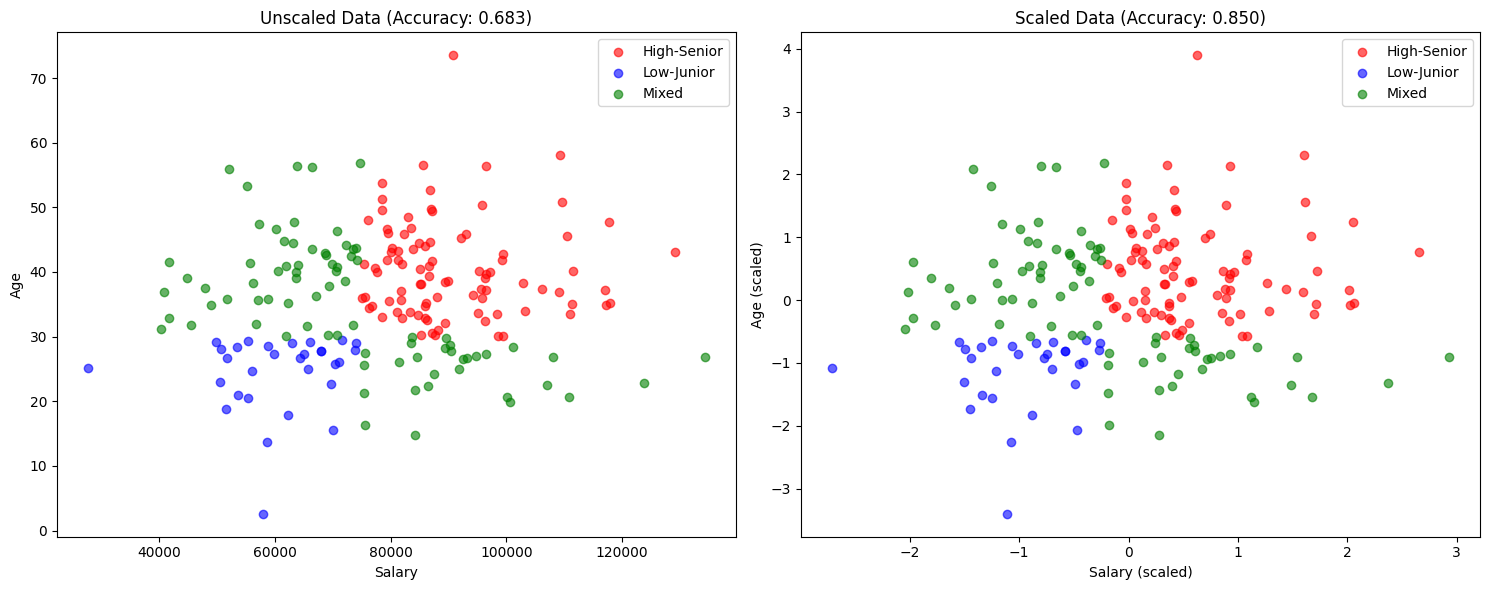

In [20]:
# Feature Scaling Demonstration
from sklearn.preprocessing import StandardScaler
def demonstrate_scaling_effect():
    # Create dataset with different scales
    np.random.seed(42)
    n_samples = 200
    
    # Feature 1: Salary (large scale)
    salary = np.random.normal(80000, 20000, n_samples)
    
    # Feature 2: Age (small scale) 
    age = np.random.normal(35, 10, n_samples)
    
    # Create 3 classes based on combinations
    labels = []
    for i in range(n_samples):
        if salary[i] > 75000 and age[i] > 30:
            labels.append('High-Senior')
        elif salary[i] <= 75000 and age[i] <= 30:
            labels.append('Low-Junior')
        else:
            labels.append('Mixed')
    
    X_unscaled = np.column_stack([salary, age])
    y_labels = np.array(labels)
    
    # Split data
    X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(
        X_unscaled, y_labels, test_size=0.3, random_state=42
    )
    
    # Test unscaled
    knn_unscaled = KNNClassifier(k=5)
    knn_unscaled.fit(X_train_us, y_train_us)
    pred_unscaled = knn_unscaled.predict(X_test_us)
    acc_unscaled = accuracy_score(y_test_us, pred_unscaled)
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_us)
    X_test_scaled = scaler.transform(X_test_us)
    
    # Test scaled
    knn_scaled = KNNClassifier(k=5)
    knn_scaled.fit(X_train_scaled, y_train_us)
    pred_scaled = knn_scaled.predict(X_test_scaled)
    acc_scaled = accuracy_score(y_test_us, pred_scaled)
    
    print(f"\nFeature Scaling Effect:")
    print(f"Unscaled accuracy: {acc_unscaled:.3f}")
    print(f"Scaled accuracy: {acc_scaled:.3f}")
    print(f"Improvement: {acc_scaled - acc_unscaled:.3f}")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Unscaled data
    colors = {'High-Senior': 'red', 'Low-Junior': 'blue', 'Mixed': 'green'}
    for label in np.unique(y_labels):
        mask = y_labels == label
        ax1.scatter(X_unscaled[mask, 0], X_unscaled[mask, 1], 
                   c=colors[label], label=label, alpha=0.6)
    ax1.set_xlabel('Salary')
    ax1.set_ylabel('Age')
    ax1.set_title(f'Unscaled Data (Accuracy: {acc_unscaled:.3f})')
    ax1.legend()
    
    # Scaled data
    for label in np.unique(y_labels):
        mask = y_labels == label
        X_scaled_full = scaler.transform(X_unscaled)
        ax2.scatter(X_scaled_full[mask, 0], X_scaled_full[mask, 1], 
                   c=colors[label], label=label, alpha=0.6)
    ax2.set_xlabel('Salary (scaled)')
    ax2.set_ylabel('Age (scaled)')
    ax2.set_title(f'Scaled Data (Accuracy: {acc_scaled:.3f})')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

demonstrate_scaling_effect()

In [21]:
# Vectorized Implementation for Speed
class KNNVectorized:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        
        for x in X:
            # Vectorized distance calculation
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            
            # Get k nearest neighbors
            k_indices = np.argpartition(distances, self.k)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            
            # Vote
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            prediction = unique_labels[np.argmax(counts)]
            predictions.append(prediction)
        
        return np.array(predictions)

In [22]:
def compare_implementations():
    # Create test dataset
    X_large, y_large = create_large_dataset(2000)
    X_train, X_test, y_train, y_test = train_test_split(
        X_large, y_large, test_size=0.1, random_state=42
    )
    
    # Test loop-based implementation
    print("\nComparing Loop-based vs Vectorized Implementation:")
    
    knn_loop = KNNClassifier(k=3)
    knn_loop.fit(X_train, y_train)
    
    start_time = time.time()
    pred_loop = knn_loop.predict(X_test[:20])  # Test on first 20 samples
    time_loop = time.time() - start_time
    
    # Test vectorized implementation
    knn_vec = KNNVectorized(k=3)
    knn_vec.fit(X_train, y_train)
    
    start_time = time.time()
    pred_vec = knn_vec.predict(X_test[:20])
    time_vec = time.time() - start_time
    
    print(f"Loop-based time: {time_loop:.4f} seconds")
    print(f"Vectorized time: {time_vec:.4f} seconds")
    print(f"Speedup: {time_loop/time_vec:.2f}x")
    print(f"Results match: {np.array_equal(pred_loop, pred_vec)}")

compare_implementations()

# Comparing Loop-based vs Vectorized Implementation:
# Loop-based time: 0.2401 seconds
# Vectorized time: 0.0034 seconds
# Speedup: 70.12x
# Results match: True


Comparing Loop-based vs Vectorized Implementation:
Loop-based time: 0.1489 seconds
Vectorized time: 0.0028 seconds
Speedup: 52.55x
Results match: True
